In [1]:
#####HMC Joint Geometric Topic Model#####
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import numpy.matlib
import scipy.linalg
import gensim
from scipy.special import gammaln
from scipy.misc import factorial
from pandas.tools.plotting import scatter_matrix
from numpy.random import *
from scipy import optimize
import seaborn as sns
import time

C:\Users\sana\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [7]:
####データの発生####
##データの設定
k = 20
hh = 2000   #ユーザー数
item = 1000   #場所数
w = np.random.poisson(np.random.gamma(30, 1/0.225, hh), hh)   #訪問数
f = np.sum(w)   #総訪問数

In [12]:
##IDとインデックスの設定
#IDの設定
d_id = np.repeat(range(hh), w)
t_id = np.zeros(f, dtype='int')
for i in range(hh):
    t_id[d_id==i] = range(w[i])
geo_id01 = np.repeat(range(hh), np.repeat(item, hh))    
geo_id02 = np.repeat(range(item), hh)

In [14]:
#インデックスの設定
index1 = np.array(range(f))
index2 = np.array(range(hh*item))
d_index = [i for i in range(hh)]
geo_index = [i for i in range(hh)]
for i in range(hh):
    d_index[i] = index1[d_id==i]
    geo_index[i] = index2[geo_id01==i] 

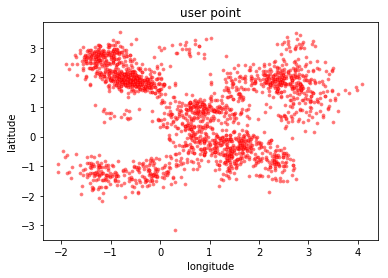

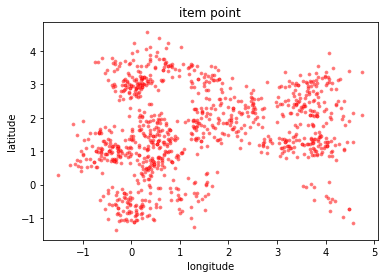

In [94]:
##すべてのアイテムが生成されるまで繰り返す

##ユーザーとアイテムの経緯度を生成
#ユーザーの場所集合を生成
s = 30
rate = np.random.dirichlet(np.repeat(2.0, s), 1).reshape(-1)
point = np.dot(np.random.multinomial(1, rate, hh), range(s))

#経緯度を生成
longitude = np.array((0, 5)); latitude = np.array((0, 5))
geo_user0 = np.zeros((hh, 2))
for j in range(s):
    index = np.array(range(hh))[point==j]
    mu = np.append(np.random.uniform(longitude[0], longitude[1], 1), np.random.uniform(latitude[0], latitude[1], 1))
    cov = np.diag(np.random.uniform(0.01, 0.15, 2))
    value = np.random.uniform(-0.6, 0.6, 1) * np.prod(np.sqrt(np.diag(cov)))
    cov[0, 1] = value; cov[1, 0] = value
    geo_user0[index, :] = np.random.multivariate_normal(mu, cov, index.shape[0])

geo_user = np.min(geo_user0) + geo_user0
plt.scatter(geo_user[:, 0], geo_user[:, 1], s=3, c="pink", alpha=0.5, linewidths="2",
            edgecolors="red")
plt.title("user point")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

#スポットの場所集合を生成
s = 25
rate = np.random.dirichlet(np.repeat(2.0, s), 1).reshape(-1)
point = np.dot(np.random.multinomial(1, rate, item), range(s))

#経緯度を生成
longitude = np.array((0, 5)); latitude = np.array((0, 5))
geo_item0 = np.zeros((item, 2))
for j in range(s):
    index = np.array(range(item))[point==j]
    mu = np.append(np.random.uniform(longitude[0], longitude[1], 1), np.random.uniform(latitude[0], latitude[1], 1))
    cov = np.diag(np.random.uniform(0.01, 0.15, 2))
    value = np.random.uniform(-0.6, 0.6, 1) * np.prod(np.sqrt(np.diag(cov)))
    cov[0, 1] = value; cov[1, 0] = value
    geo_item0[index, :] = np.random.multivariate_normal(mu, cov, index.shape[0])

geo_item = np.min(geo_item0) + geo_item0
plt.scatter(geo_item[:, 0], geo_item[:, 1], s=3, c="pink", alpha=0.5, linewidths="2",
            edgecolors="red")
plt.title("item point")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

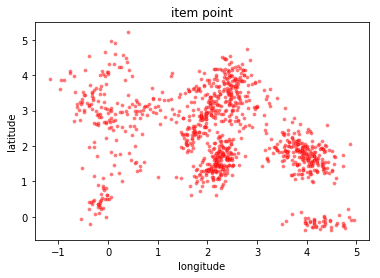